In [ ]:
import tensorflow as tf

from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist

import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


In [ ]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

print('x_train.shape : {0}, x_test.shape : {1}'.format(x_train.shape, x_test.shape))
print('t_train.shape : {0}, t_test.shape : {1}'.format(t_train.shape, t_test.shape))


x_train.shape : (60000, 28, 28), x_test.shape : (10000, 28, 28)
t_train.shape : (60000,), t_test.shape : (10000,)


In [ ]:
from tensorflow.keras.utils import to_categorical  # one-hot encoding

t_train_one_hot = to_categorical(t_train, 10)

t_test_one_hot = to_categorical(t_test, 10)

In [ ]:
model_one_hot = Sequential()

model_one_hot.add(Conv2D(input_shape=(28,28,1),
                kernel_size=3, filters=32,
                 strides=(1,1), activation='relu', use_bias=True, padding='SAME'))

model_one_hot.add(MaxPool2D(pool_size=(2,2),padding='SAME'))

model_one_hot.add(Flatten())

model_one_hot.add(Dense(10, activation='softmax'))

In [ ]:
model_one_hot.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model_one_hot.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 10)                62730     
                                                                 
Total params: 63,050
Trainable params: 63,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist_one_hot = model_one_hot.fit(x_train.reshape(-1,28,28,1), t_train_one_hot,
                 batch_size=50, epochs=30, validation_split=0.2)

Epoch 1/30
960/960 [==============================] - 9s 7ms/step - loss: 0.2784 - accuracy: 0.9217 - val_loss: 0.1249 - val_accuracy: 0.9671
Epoch 2/30
960/960 [==============================] - 5s 5ms/step - loss: 0.0960 - accuracy: 0.9727 - val_loss: 0.0907 - val_accuracy: 0.9726
Epoch 3/30
960/960 [==============================] - 5s 5ms/step - loss: 0.0697 - accuracy: 0.9802 - val_loss: 0.0726 - val_accuracy: 0.9793
Epoch 4/30
960/960 [==============================] - 5s 5ms/step - loss: 0.0582 - accuracy: 0.9828 - val_loss: 0.0681 - val_accuracy: 0.9806
Epoch 5/30
960/960 [==============================] - 5s 6ms/step - loss: 0.0499 - accuracy: 0.9851 - val_loss: 0.0649 - val_accuracy: 0.9820
Epoch 6/30
960/960 [==============================] - 5s 5ms/step - loss: 0.0429 - accuracy: 0.9871 - val_loss: 0.0728 - val_accuracy: 0.9799
Epoch 7/30
960/960 [==============================] - 5s 5ms/step - loss: 0.0381 - accuracy: 0.9887 - val_loss: 0.0657 - val_accuracy: 0.9801
Epoch 

In [ ]:
model_one_hot.evaluate(x_test.reshape(-1,28,28,1), t_test_one_hot)

313/313 [==============================] - 2s 5ms/step - loss: 0.1172 - accuracy: 0.9760


[0.11715443432331085, 0.9760000109672546]

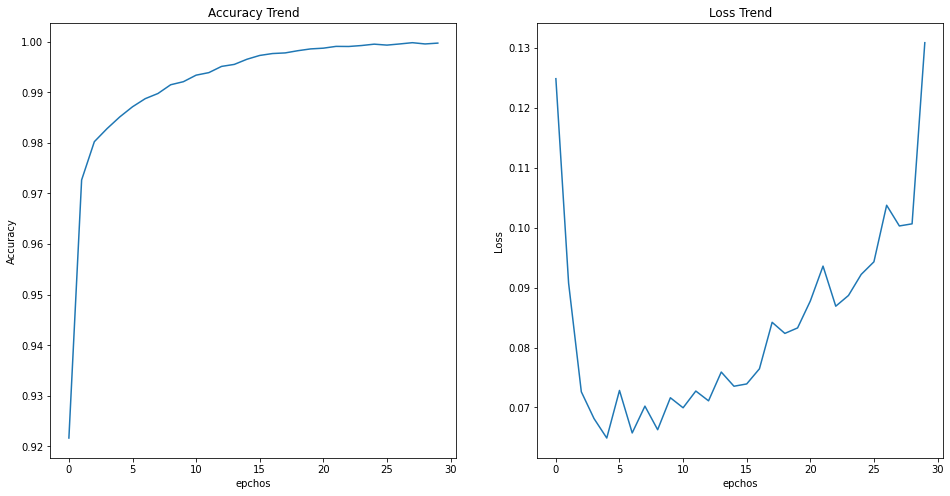

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.plot(hist_one_hot.history['accuracy'])
plt.xlabel('epchos')
plt.ylabel('Accuracy')
plt.title('Accuracy Trend')
plt.subplot(122)
plt.plot(hist_one_hot.history['val_loss'])
plt.xlabel('epchos')
plt.ylabel('Loss')
plt.title('Loss Trend')
plt.show()